# Dimensionality Reduction
## Introduction
- Reduce overfitting in dataset with multiple dimension by
 - selecting the most important components of the feature space
 - drop the other components
- Reduce computational cost
- Help interpret high dimensional datasets.

## How does it work?
- Dimensionality reduction can be used in both supervised and unsupervised learning context
- In unsupervised learning, the primary algorithms used are:
 - Principal Component Analysis
 - Singular Value Decomposition
- In supervised learning, 
 - Linear Discriminant Analysis
 - PCA

## PCA
- Creates new data features by analysing the characteristics of the dataset
- Characteristics are summarised or combined together
- Selects the "principal" or most influential characteristics of the dataset and creates features based on them

### Features
- PCA preserves the corellation between variables when it creates new features
- The principal components are linear combinations of the original variables
- Calculated with concepts called eigenvectors.
 - Assumed that the new components are orthogonal or unrelated to one another

In [4]:
# https://www.kaggle.com/uciml/mushroom-classification/
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [5]:
m_data = pd.read_csv('/home/febriyan/Documents/IntroToStatWithPython/dataset/mushrooms.csv')

# Machine learning systems work with integers, we need to encode these
# string characters into ints

encoder = LabelEncoder()

# Now apply the transformation to all the columns:
for col in m_data.columns:
    m_data[col] = encoder.fit_transform(m_data[col])

X_features = m_data.iloc[:,1:23]
y_label = m_data.iloc[:, 0]

In [7]:
# Scale the features. This will impact how our data is analysed by PCA
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)

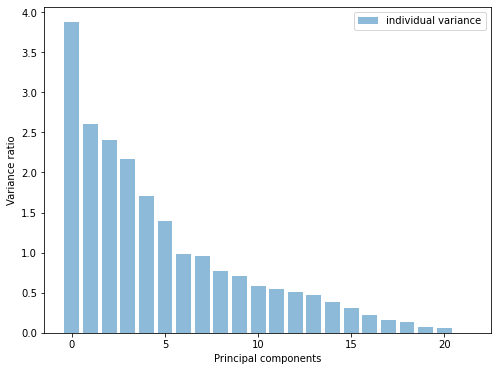

In [8]:
# Use PCA to get the list of features and plot the features with the most explanatory power or variance
# Around 17 or 18 features explain the majority, almost 95% of the data in this case
pca = PCA()
pca.fit_transform(X_features)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(22), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

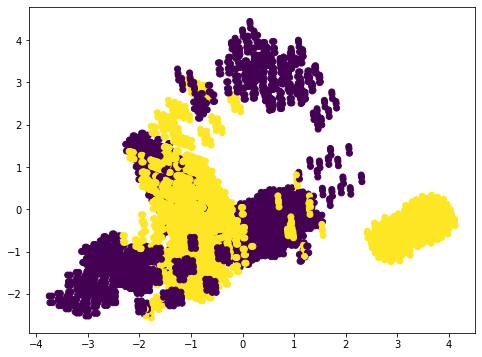

In [9]:
# Convert the features into the 17 top features
# Plot scatter plot of the data point classification based on these 17 features
pca2 = PCA(n_components=17)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,5], c=m_data['class'])
plt.show()

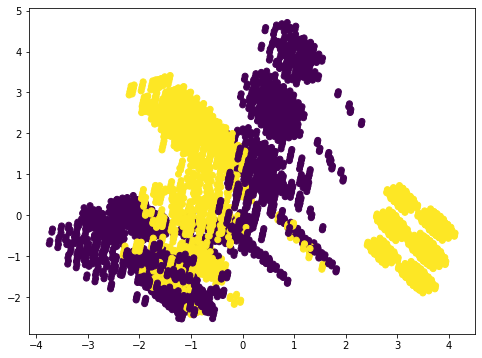

In [10]:
# Compare with when we choose top 2 features
pca3 = PCA(n_components=2)
pca3.fit(X_features)
x_3d = pca3.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,1], c=m_data['class'])
plt.show()

# Singular Value Decomposition
- Purpose: simplify a matrix and make it easier to do calculation with the matrix
## How it works
- Imagine we have a matrix and we want to reduce the number of columns the matrix has
 - This reduces dimensionality while still preserving as much of the variability in the data as possible
- We can say that matrix A equals the transpose of matrix V: A=U∗D∗Vt

| A   | U   | V   |D    |
| --- | --- | --- | --- |
| x*y | x*x | y*y |x*y |

???
- Decomposing values for a matrix involves converting the singular values in the original matrix into the diagonal values of the new matrix
- Orthogonal matrices do not have their properties changed if they are multiplied by other numbers, and we can take advantage of this property to get an approximation of matrix A. 
- We break/decompose matrix A down into U, D, and V, we then have three different matrices that contain the information of Matrix A.
- It turns out that the left-most columns of the matrices hold the majority of our data, and we can select just these few columns to have a good approximation of Matrix A

In [14]:
# One of the most common ways that SVD is used is to compress images.
import numpy
from PIL import Image

In [15]:
# Define functions first
def load_image(image):
    image = Image.open(image)
    im_array = numpy.array(image)

    red = im_array[:, :, 0]
    green = im_array[:, :, 1]
    blue = im_array[:, :, 2]

    return red, green, blue

In [24]:
def channel_compress(color_channel, singular_value_limit):
    '''
    Call Numpy's SVD function on the color channel we want
    Create an array of zeroes to fill in after the matrix multiplication is completed
    Specify the singular value limit to use when doing the calculations
    '''
    u, s, v = numpy.linalg.svd(color_channel)
    compressed = numpy.zeros((color_channel.shape[0], color_channel.shape[1]))
    n = singular_value_limit

    left_matrix = numpy.matmul(u[:, 0:n], numpy.diag(s)[0:n, 0:n])
    inner_compressed = numpy.matmul(left_matrix, v[0:n, :])
    compressed = inner_compressed.astype('uint8')
    return compressed

In [26]:
def compress_image(red, green, blue, singular_val_lim):
    '''
    Matrix multiplication on the diagonal and the value limits in the U matrix
    This gets us the left matrix and we then multiply it with the V matrix
    This should get us the compressed values which we transform to the ‘uint8' type
    Get the compressed values for the three color channels and 
    transform them from Numpy arrays into image components using PIL
    '''
    compressed_red = channel_compress(red, singular_val_lim)
    compressed_green = channel_compress(green, singular_val_lim)
    compressed_blue = channel_compress(blue, singular_val_lim)

    im_red = Image.fromarray(compressed_red)
    im_blue = Image.fromarray(compressed_blue)
    im_green = Image.fromarray(compressed_green)

    new_image = Image.merge("RGB", (im_red, im_green, im_blue))
    new_image.show()
    #new_image.save("dog3-edited.jpg")

In [28]:
# Notice 1) smaller image size(memory use) for compressed file, 2) noise in image
red, green, blue = load_image("/home/febriyan/Documents/IntroToStatWithPython/dataset/dog3.jpg")
singular_val_lim = 10
compress_image(red, green, blue, singular_val_lim)

### STILL NEED TO RE-LEARN

- https://www.youtube.com/watch?v=P5mlg91as1c
- https://www.youtube.com/watch?v=gXbThCXjZFM
- https://www.youtube.com/watch?v=YPe5OP7Clv4

# Linear Discriminant Analysis
- Operates by projecting data from a multidimensional graph onto a linear graph
 - Imagine a graph filled up with data points of two different classes
 - Assume no line that will neatly separate the data into two classes
 - The 2D graph can be reduced to 1D. This 1D graph 
 can then be used to hopefully achieve the best possible separation of the data points.
- 2 Goals
 - minimizing the variance of the two classes 
 - maximizing the distance between the means of the two data classes
 
### How it works?
- a new axis will be plotted in the 2D graph
- This new axis should separate the two data points based on the previously mentioned criteria.
- Once the new axis has been created the data points within the 2D graph are redrawn along the new axis.

- three different steps to move the original graph to the new axis. 
 - First, the separability between the classes has to be calculated, and this is based on the distance between the class means or the between-class variance. 
 - In the next step, the within class variance must be calculated, which is the distance between the mean and sample for the different classes. 
 - Finally, the lower dimensional space that maximizes the between class variance has to be constructed.

- LDA works best when the means of the classes are far from each other. 
- If the means of the distribution are shared it won't be possible for LDA to separate the classes with a new linear axis.

In [29]:
# https://www.kaggle.com/c/titanic
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
training_data = pd.read_csv("/home/febriyan/Documents/IntroToStatWithPython/dataset/titanic/train.csv")

# Let's drop the cabin and ticket columns
training_data.drop(labels=['Cabin', 'Ticket'], axis=1, inplace=True)

training_data["Age"].fillna(training_data["Age"].median(), inplace=True)
training_data["Embarked"].fillna("S", inplace=True)

In [32]:
'''
Encode non-numerical features
Drop name column (it seems unlikely to be useful in classification)
'''
encoder_1 = LabelEncoder()

# Fit the encoder on the data
encoder_1.fit(training_data["Sex"])

# Transform and replace the training data
training_sex_encoded = encoder_1.transform(training_data["Sex"])
training_data["Sex"] = training_sex_encoded

encoder_2 = LabelEncoder()
encoder_2.fit(training_data["Embarked"])

training_embarked_encoded = encoder_2.transform(training_data["Embarked"])
training_data["Embarked"] = training_embarked_encoded

# Assume the name is going to be useless and drop it
training_data.drop("Name", axis=1, inplace=True)

In [33]:
# Scale the values
# Remember that the scaler takes arrays
ages_train = np.array(training_data["Age"]).reshape(-1, 1)
fares_train = np.array(training_data["Fare"]).reshape(-1, 1)

scaler = StandardScaler()

training_data["Age"] = scaler.fit_transform(ages_train)
training_data["Fare"] = scaler.fit_transform(fares_train)

# Now to select our training and testing data
features = training_data.drop(labels=['PassengerId', 'Survived'], axis=1)
labels = training_data['Survived']

In [34]:
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=27)

model = LDA()
model.fit(X_train, y_train)
preds = model.predict(X_val)
acc = accuracy_score(y_val, preds)
f1 = f1_score(y_val, preds)

print("Accuracy: {}".format(acc))
print("F1 Score: {}".format(f1))

Accuracy: 0.8100558659217877
F1 Score: 0.734375


In [35]:
#let's run a Logistic Regression classifier 
#on the data first so we can see what our performance is 
#prior to dimensionality reduction
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
preds = logreg_clf.predict(X_val)
acc = accuracy_score(y_val, preds)
f1 = f1_score(y_val, preds)

print("Accuracy: {}".format(acc))
print("F1 Score: {}".format(f1))

Accuracy: 0.8212290502793296
F1 Score: 0.7538461538461538


In [36]:
# transform the data features by specifying 
# a number of desired components for LDA and 
# fitting the model on the features and labels. 
LDA_transform = LDA(n_components=1)
LDA_transform.fit(features, labels)
features_new = LDA_transform.transform(features)

# Print the number of features
print('Original feature #:', features.shape[1])
print('Reduced feature #:', features_new.shape[1])

# Print the ratio of explained variance
print(LDA_transform.explained_variance_ratio_)

Original feature #: 7
Reduced feature #: 1
[1.]


In [37]:
# do train/test split again with the new features and 
# run the classifier again to see how performance changed
X_train, X_val, y_train, y_val = train_test_split(features_new, labels, test_size=0.2, random_state=27)

logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
preds = logreg_clf.predict(X_val)
acc = accuracy_score(y_val, preds)
f1 = f1_score(y_val, preds)

print("Accuracy: {}".format(acc))
print("F1 Score: {}".format(f1))

Accuracy: 0.8212290502793296
F1 Score: 0.7500000000000001


https://www.youtube.com/watch?v=azXCzI57Yfc
- LDA uses the information from multiple axes to create new axes capable to best separate the groups
- How to create the new axes? 2 criteries
 - Max the distance between the 2 means
 - Minimise the scatter around one group

# Reference
- https://stackabuse.com/dimensionality-reduction-in-python-with-scikit-learn/
- https://towardsdatascience.com/dimensionality-reduction-toolbox-in-python-9a18995927cd
- https://pythonmachinelearning.pro/dimensionality-reduction/
- https://www.datacamp.com/courses/dimensionality-reduction-in-python